### Student Information
Name: 張堂真

Student ID:109065514

GitHub ID:Leacius

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---
### Part 1

In [1]:
### Begin Assignment Here

import os
import nltk
import pandas as pd
import numpy as np

import gensim
import warnings
from gensim.models import KeyedVectors

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

---
### ** >>> Exercise  1: **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [2]:
# load data

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

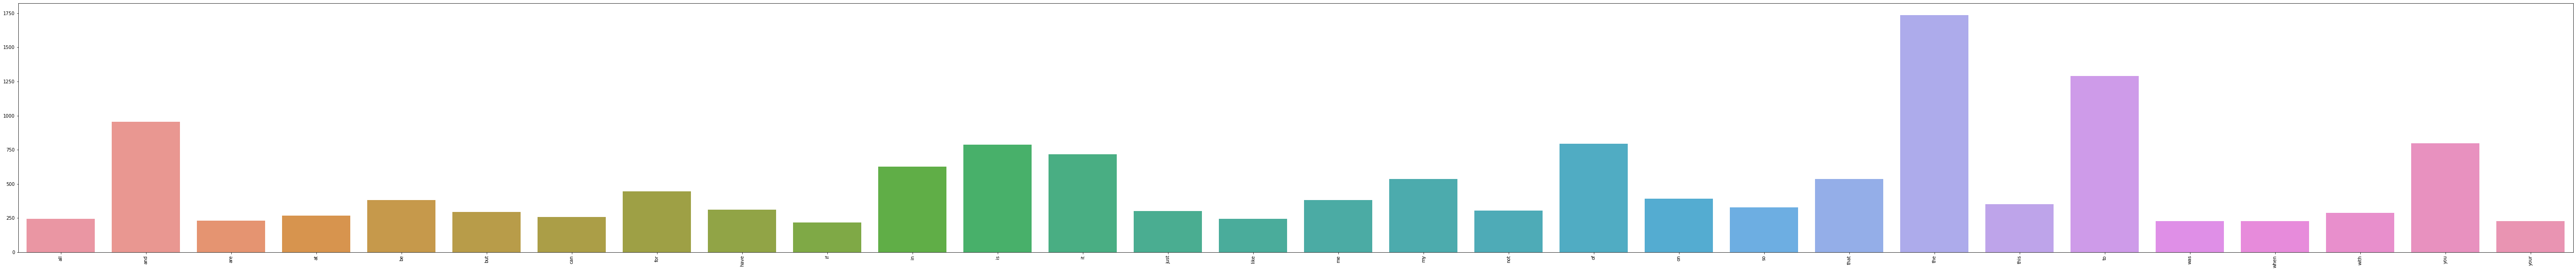

In [3]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
Top_index = np.sort(np.argsort(term_frequencies)[-30:])
Names = [i for i in [count_vect.get_feature_names()[j] for j in [Top_index[i] for i in range(30)]]]
Freqs = [term_frequencies[i] for i in Top_index]

plt.subplots(figsize=(100, 10))
Top_index
g = sns.barplot(x = Names, y = Freqs)
g.set_xticklabels(Names, rotation = 90);

---
### ** >>> Exercise 2 : **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [4]:
vectorizer = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)

X_counts_tfidf = vectorizer.fit_transform(train_df.text)

feature_names = vectorizer.get_feature_names()
feature_names[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3: **  
Can you interpret the results above? What do they mean?

1. In Y axis, it shows the predict results of the model. In X axis, it shows that the ground truth labels. If we look in diagonal, it shows the number of cases that the model predict correctly. So the higher the sum of diagonal, the better the model predict for the data.
2. Suppose We have four labels, from 1 to 4. First we look in y direction and the row y = 1. It will give us 4 numbers. In (2,1) position, the number tells us that cases of the ground truth is 2, but the model predict it would be 1. So on and so forth. The sum of column in y = 1 is the number of data that the model predicts in 1.
3. Now we look in x direction and the column x = 1. The sum of row in x = 1 is the number of data that label in 1. In (1,3) position, the number is the wrong prediction cases which ground truth is 1, but the model predict in 3.
4. The greater numbers ouside the diagonal, the higher probability that the wrong prediction between x and y.

---
### ** >>> Exercise 4 : **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [5]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

BOW_500.fit(train_df.text)
le = preprocessing.LabelEncoder()
le.fit(train_df.emotion)

X_train = BOW_500.transform(train_df['text']).toarray()
y_train = le.transform(train_df['emotion'])

X_test = BOW_500.transform(test_df['text']).toarray()
y_test = le.transform(test_df['emotion'])

C:\Users\Leacius\anaconda3\envs\tensorflow1_15\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [6]:
NB = GaussianNB()
model = NB.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = sum(y_pred == y_test)/np.size(y_test[:])
print('The testing accuracy is : %s' % acc)

The testing accuracy is : 0.6685878962536023


---
### ** >>> Exercise 5 : **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

1. In Navie Bayes model, it use the concept of Bayes' theorem. After transposition of parameters, it give the posterior of the results. This posterior tells us about the probability of the prediction. It is a way to represent conditional dependecies of set of random variables.
2. In Decision Tree model, it use cross entropy as the decision criterien to decide yes or no for the certain condition.
3. The final results of both are to classify the data, but Navie Bayes model is give a confidence and Decision Tree model is to decide yes or no.

---
### ** >>> Exercise 6 : **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

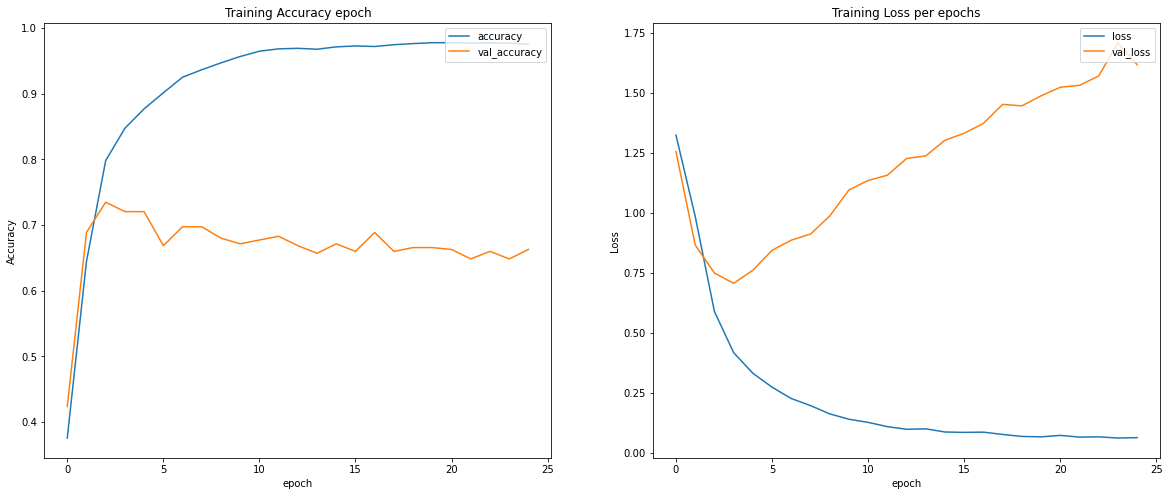

In [7]:
# load
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

#plot
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
training_log.plot(x = 'epoch', y ='accuracy',title = "Training Accuracy epoch",ylabel = "Accuracy",ax =ax1,)
training_log.plot(x = 'epoch', y ='val_accuracy',ax =ax1 )
plt.legend(loc='upper right')

ax2 = fig.add_subplot(122)
training_log.plot(x = 'epoch', y ='loss',title = "Training Loss per epochs", ylabel = "Loss",ax =ax2)
training_log.plot(x = 'epoch', y ='val_loss',ax =ax2 )
plt.legend(loc='upper right')

---
### ** >>> Exercise 7 : **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


1. We first use tokenizer to seperate input sentence into a simple word. And then we can let the certain word like "happy" in the sentence, "I am happy." to be 1. The other words is to be 0, like [0 0 1] as input to the network, and then out put the same length with the word vector. Now We compare these two vectors and calculate the loss we designed to train our model.

2. We can concatenate word vectors to represent a sentence.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [8]:
# w2v model
model_path = os.path.join(os.path.abspath(os.getcwd()), "GoogleNews-vectors-negative300.bin.gz")
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [20]:
# target word
word_list = ["angry", "happy", "sad", "fear" ]
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in model.most_similar('fear', topn=topn)]
target_words = angry_words + happy_words + sad_words + fear_words

# label color
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

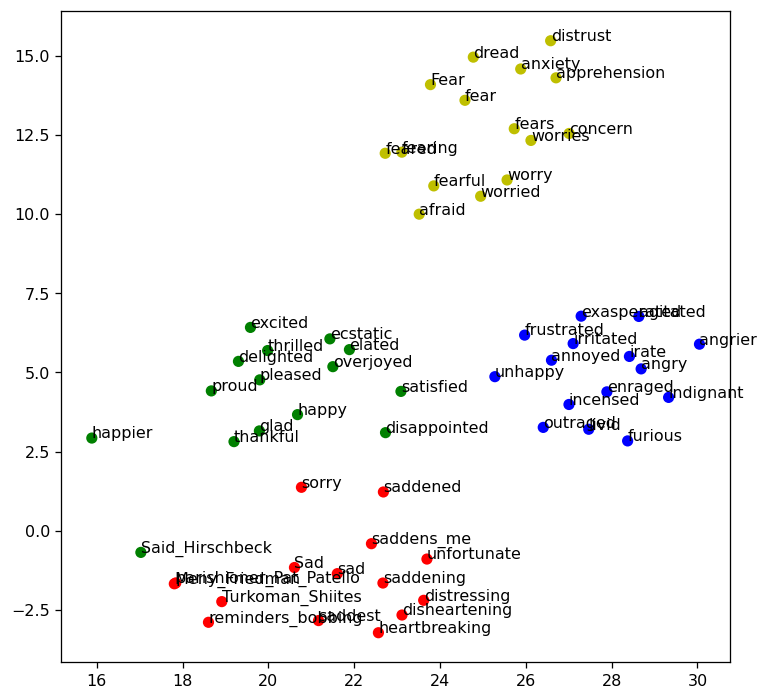

In [58]:
## prepare training word vectors
size = 271

target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=270)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### Part 2
### kaggle competition  ID : Leacius

<table><tr>
    <td><img src="pics/pic9.png" style="width: 2700px;"/> </td>
</tr></table>

---
### Part 3
### kaggle competition  report

Import the packages I need

In [ ]:
import nltk
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

from scipy.fftpack import fft,ifft
from scipy.signal import butter, lfilter
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def compare(A,B):
    diff = list(set(A)-set(B)) + list(set(B)-set(A))
    return diff
def data_sep(To_Array, df_data_train, le, length):
    num = [i for i in range(length)]
    A = random.sample(num,int(length*0.75))
    B = compare(A,num)

    X_train = To_Array[A]
    y_train = le.transform(df_data_train.emotion[A])
    
    X_test = To_Array[B]
    y_test = le.transform(df_data_train.emotion[B])
    
    return X_train, y_train, X_test, y_test

def load_data(le, df_label):
    df = pd.read_json("D:/DataMining/HW2_kaggle/tweets_DM.json", encoding='utf-8', lines=True)
    Series_of_dict = list(pd.DataFrame(list(df._source.values)).tweet)
    df_data = pd.DataFrame.from_dict(Series_of_dict).drop(columns='hashtags')
    diff = compare(df_data.tweet_id,df_label.tweet_id)
    df_data.set_index("tweet_id" , inplace=True)
    df_label.set_index("tweet_id" , inplace=True)
    
    df_data_val = df_data.loc[diff]
    df_data_train = df_data.loc[df_label.index]
    df_data_train = pd.concat([df_data_train,df_label],axis = 1)
    return df_data_train, df_data_val

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Load data

In [ ]:
# load data
df_label = pd.read_csv("D:/DataMining/HW2_kaggle/emotion.csv")
df_data_train, df_data_val = load_data(le, df_label)

Word2Vec with 500 features

In [ ]:
vectorizer = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
tfidf_fit = vectorizer.fit(df_data_train.text)

# encoder
le = preprocessing.LabelEncoder()
le.fit(df_label.emotion)

# data
To_Array = tfidf_fit.transform(df_data_train.text).toarray()
X_val = tfidf_fit.transform(df_data_val.text).toarray()

look data as an signal and do some signal processing

In [ ]:
# look data as an signal
N_t = len(To_Array)
N_v = len(X_val)
yf_t = abs(fft(To_Array,axis = 1)[:,0:int(500/2)])
yf_v = abs(fft(X_val,axis = 1)[:,0:int(500/2)])

# band pass filter
t = 45
T = 60
train_data = butter_bandpass_filter(yf_t[:,1:N_t//2],t,T,1000)
val_data = butter_bandpass_filter(yf_v[:,1:N_t//2],t,T,1000)

tmp = df_label.reset_index().reset_index().set_index("emotion")
target = le.inverse_transform([i for i in range(8)])

tmp_id = list(tmp.loc['joy']["index"])
tmp_id = compare(random.sample(tmp_id,int(len(tmp_id)*0.7)),[i for i in range(len(df_data_train))])
train_data = train_data[tmp_id]
df_data_train = df_data_train.reset_index().loc[tmp_id]

In [ ]:
# sep data and save data
length = len(df_data_train)
X_train, y_train, X_test, y_test = data_sep(train_data,df_data_train.reset_index(),le,length)

# save
np.save('D:/DataMining/HW2_kaggle/X_train.npy', X_train)
np.save('D:/DataMining/HW2_kaggle/y_train.npy', y_train)
np.save('D:/DataMining/HW2_kaggle/X_test.npy', X_test)
np.save('D:/DataMining/HW2_kaggle/y_test.npy', y_test)
np.save('D:/DataMining/HW2_kaggle/X_evaluation.npy', val_data)
np.save('D:/DataMining/HW2_kaggle/train_array.npy',To_Array)
np.save('D:/DataMining/HW2_kaggle/val_array.npy',X_val)
# df_data_val.to_csv('D:/DataMining/HW2_kaggle/X_evaluation.csv')

0. First, I use NB to regard as my baseline.
1. I find that this data set is unbalance, it is easy for model to be trained overfit.
2. I just try to use the balance data of word vectors I created. But the result of my methods is not that good. It seems to be that my model is too simple for this case.
3. I first use the data after signal processing.
4. And the result of my model is better than before.
5. I realize that how important the data pre-processing is. I just change the methods of the pre-processing and then put the data into the same network model. I get different results. Hope I can learn more during the class.

6. I put some of my results fig in the folder FIG.
<table><tr>
    <td><img src="pics/pic10.png" style="width: 900px;"/> </td>
    <td><img src="pics/pic11.png" style="width: 900px;"/> </td>
</tr></table>

<table><tr>
    <td><img src="pics/pic12.png" style="width: 900px;"/> </td>
    <td><img src="pics/pic13.png" style="width: 900px;"/> </td>
</tr></table>

<table><tr>
    <td><img src="pics/pic14.png" style="width: 900px;"/> </td>
    <td><img src="pics/pic15.png" style="width: 900px;"/> </td>
</tr></table>

<table><tr>
    <td><img src="pics/pic16.png" style="width: 900px;"/> </td>
    <td><img src="pics/pic17.png" style="width: 900px;"/> </td>
</tr></table>